In [9]:
11.8620/1.495978e8

7.929260991806029e-8

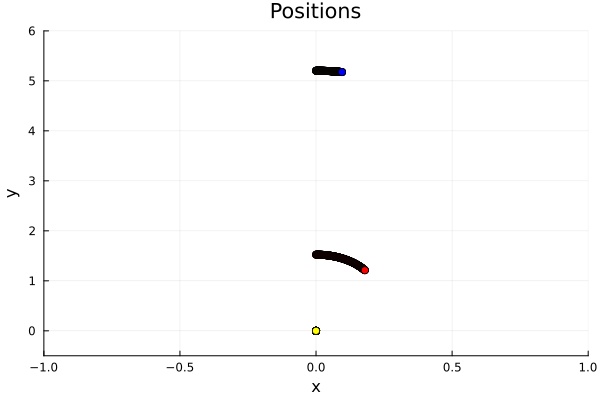

[0.09543257920642477, 5.175807044811581, -3.0426502869526815e-5]


┌ Info: Saved animation to /Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif
└ @ Plots /Users/shim/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif")
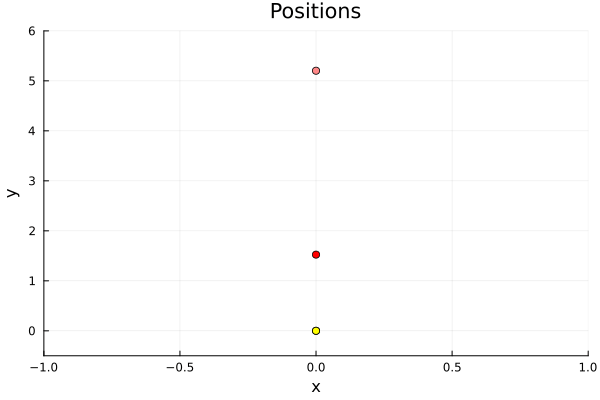

In [48]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG

gr()

function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    t = 0.0
    tEnd = 1209600.0
    dt = 3600.0
    G = 1.0e-12
    mass = [
        1.0
        3.2272e-7
        9.5479e-4
    ]
    pos = [
        0.0 0.0 0.0
        0.0 1.5237 0.0
        0.0 5.2026 0.0
    ]
    vel = [
        0.0 0.0 0.0
        1.6096e-7 0.0 0.0
        7.9293e-8 0.0 0.0
    ]
    vel .-= mean(mass .* vel) / mean(mass)
    
    acc = getAcc(pos, mass, G)

    KE,PE = getEnergy(pos, vel, mass, G)

    Nt = Int(ceil(tEnd/dt))

    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE

    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt

        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end
    
    p = scatter([0], [0], xlims=(-1,1), ylims=(-0.5,6), title="Positions", xlabel="x", ylabel="y", legend=false)
    anim = @animate for frame in 1:Nt
        for i in 1:3
            x = pos_save[i,1,frame]
            y = pos_save[i,2,frame]
            scatter!(p, [x], [y], color=colors[i])
        end
    end
    
    scatter!(p, [pos_save[3,1,Nt]], [pos_save[3,2,Nt]], color=:blue)
    println(pos_save[3,:,Nt])
    display(p)
    gif(anim, "animation.gif", fps=3600)
end

colors = [:yellow, :red, :"#ff8888"]

main()


## ↑割と望ましい結果
しかし正しい値ではない

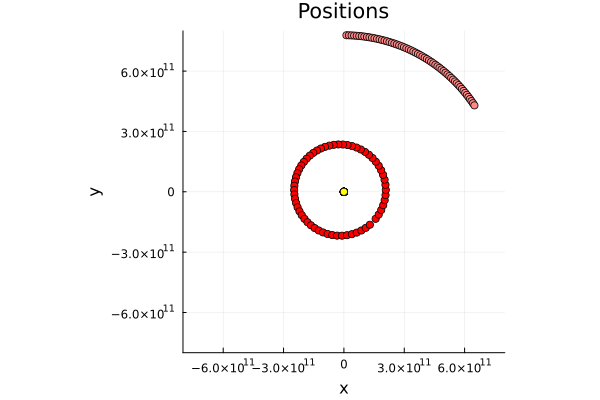

[0.9393186263434355, -1.025416149167969, -0.04453274045473931]first
[0.8624987966388415, -1.0944299309544376, -0.04575911658629032]end


┌ Info: Saved animation to /Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif
└ @ Plots /Users/shim/.julia/packages/Plots/ju9dp/src/animation.jl:156


Plots.AnimatedGif("/Users/shim/Desktop/Code/dev/Asteroid/Julia/animation.gif")
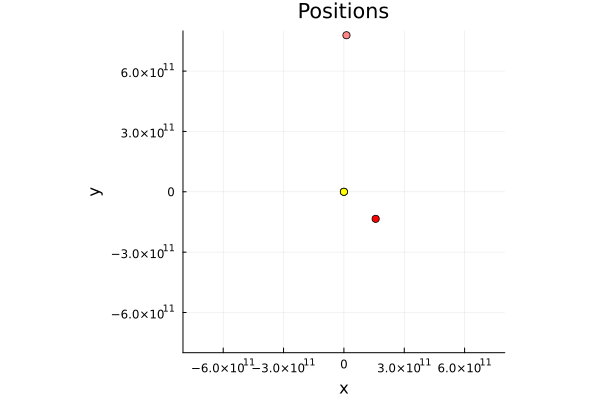

In [38]:
using LinearAlgebra
using Statistics
using Plots
using FFMPEG

gr()

function getAcc(pos, mass , G)
    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]

    #天体間の距離
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z

    #距離の3乗の逆数
    inv_r3 = (dx.^2 .+ dy.^2 .+ dz.^2 .+ 0.1).^(-1.5)

    #加速度
    ax = G * (dx .* inv_r3) * mass
    ay = G * (dy .* inv_r3) * mass
    az = G * (dz .* inv_r3) * mass

    #連結
    return hcat(ax,ay,az)
end

function getEnergy(pos, vel, mass, G)
    #運動エネルギーの総和
    KE = 0.5 * sum(sum(mass .* vel^2))

    x = pos[:,1,1]
    y = pos[:,2,1]
    z = pos[:,3,1]
    dx = x' .- x
    dy = y' .- y
    dz = z' .- z 
    
    inv_r = (dx.^2 .+ dy.^2 .+ dz.^2) .^ (0.5)
    inv_r[inv_r .> 0] = 1.0 ./ inv_r[inv_r .> 0]
    PE = G * sum(sum(triu(-(mass * mass')*inv_r,1)))

    return KE, PE

end

function main()
    t = 0.0
    tEnd = 60.0 * 60.0 * 24.0 * 680.0 #1火星年
    dt = 60.0 * 60.0 #1時間
    G = 6.674e-11
    mass = [
        1.988e30
        6.416e23
        1.898e27
    ]
    pos = [
        0.0 0.0 0.0
        1.4052e11 -1.534e11 -6.662e9
        0.0 7.783e11 0.0
    ]
    vel = [
        0.0 0.0 0.0
        18779.4 18438.9 -74.1
        13.06e3 0.0 0.0
    ]
    vel .-= mean(mass .* vel) / mean(mass)
    
    acc = getAcc(pos, mass, G)
    
    KE,PE = getEnergy(pos, vel, mass, G)
    
    Nt = Int(ceil(tEnd/dt))
    
    pos_save = zeros((3,3,Nt+1))
	pos_save[:,:,1] = pos
	KE_save = zeros(Nt+1)
	KE_save[1] = KE
	PE_save = zeros(Nt+1)
	PE_save[1] = PE
    
    vel_save = zeros(Nt+1)
    
    vel2_save = zeros(Nt+1)
    
    for i in 1:Nt
		vel += acc * dt/2.0
		pos += vel * dt
		acc = getAcc( pos, mass, G)
		vel += acc * dt/2.0
		t += dt
        
        KE, PE  = getEnergy( pos, vel, mass, G )
        pos_save[:,:,i+1] = pos
		KE_save[i+1] = KE
		PE_save[i+1] = PE
    end
    
    p = scatter([0], [0], xlims=(-8.0e11,8.0e11), ylims=(-8.0e11,8.0e11), title="Positions", xlabel="x", ylabel="y", aspect_ratio=:equal, legend=false)
    al = Int(Nt/60.0)
    anim = @animate for frame in 1:60
        for i in 1:3
            x = pos_save[i,1,frame*al]
            y = pos_save[i,2,frame*al]
            scatter!(p, [x], [y], color=colors[i])
        end
    end
    println(pos_save[2,:,1] ./ 1.495978e11, "first")
    println(pos_save[2,:,Nt+1] ./ 1.495978e11, "end")

    display(p)
    gif(anim, "animation.gif", fps=10)

end

colors = [:yellow, :red, :"#ff8888"]

main()


## ケプラーの第三法則

In [23]:
au = 1.495978e11
a = 1.0000
p = 1.00002 * 365.25 * 24 * 60 * 60
println((a*au)^3 / p^2)
earth = 5.972e24
G = 6.674e-11
sun = 332946

println(G * (sun * earth + earth)/(4 * π^2))

3.361633125509351e18
3.361409094256931e18


In [48]:
G = 6.674e-11
m = 1.988e30 + 6.416e23
u = G * m
a = 2.279e11
println(sqrt(u*(2/a - 1/a)))

24128.437485302664


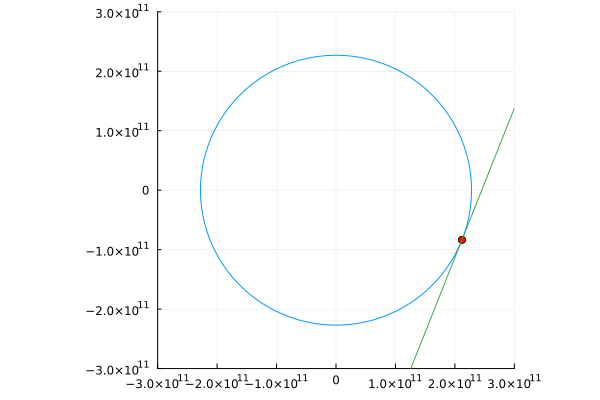

[18779.470524205746, 18438.949250089885, -74.17479007886226]
26318.603012249456


In [22]:
using Plots

G = 6.674e-11
# 質量 (kg)
mass = 1.988e30 + 6.416e23
u = G * mass
# 初期座標 (au) (2024/4/1)
x=0.9393652962242413
y=-1.0254610575824845
z=-0.04453588682426547
# 天文単位
au = 1.495978e11
# 太陽との距離（m）
r = sqrt(x^2+y^2+z^2) * au
# 軌道長半径 (m)
a = 2.279e11
# 離心率
e = 0.0934

# 離心近点角
E = 5.906042070167692
# 軌道の傾き
m = -sqrt(1.0 - e^2)/tan(E)
# 軌道速度「軌道面上」 (m/s)
v = sqrt(u * (2/r - 1/a))
VX = v/sqrt(1+m^2)
VY = v/sqrt(1+m^-2)

t = 0:0.01:2π
fx(t) = a*cos(t)
fy(t) = a*sqrt(1-e^2)*sin(t)
p = plot(fx.(t), fy.(t), aspect_ratio=:equal, legend=false, xlims=(-3.0e11,3.0e11), ylims=(-3.0e11,3.0e11))
scatter!(p, [a*cos(E)], [a*sqrt(1-e^2)*sin(E)], color=:red)
l(z) = m*(z-a*cos(E)) + a*sqrt(1-e^2)*sin(E)
plot!(p, l)
display(p)

incl = deg2rad(1.848)
lan = deg2rad(49.487)
peri = deg2rad(336.168 - 49.487)

# 軌道速度「日心黄道座標系」 (m/s)
vel = [
        cos(lan) -sin(lan) 0.0
        sin(lan) cos(lan) 0.0
        0.0 0.0 1.0
    ] * [
        1.0 0.0
        0.0 cos(incl)
        0.0 sin(incl)
    ] * [
        cos(peri) -sin(peri)
        sin(peri) cos(peri)
    ] * [
        VX
        VY
    ]

println(vel)
println(sqrt(sum(vel.^2)))

In [34]:
pos = [
    0.9393652962242413
    -1.0254610575824845
    -0.04453588682426547
    ]
au = 1.495978e11
pos .* au

3-element Vector{Float64}:
  1.405269817114948e11
 -1.53406718200013e11
 -6.662470689959102e9